In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from zipfile import ZipFile
from matplotlib import pyplot as plt

In [5]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)

train = datagen.flow_from_directory(
    '/content/drive/MyDrive/Cotton plant disease prediction/train',
    seed = 80,
    subset = 'training',
    batch_size = 32
)

valid = datagen.flow_from_directory(
    '/content/drive/MyDrive/Cotton plant disease prediction/val',
    seed = 80,
    subset = 'validation',
    batch_size = 32
)

Found 1562 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


In [20]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
layer = tf.keras.layers.Input(shape=(None, None, 3))
resnet = ResNet152V2(include_top=False, weights='imagenet', input_tensor=layer)

for layer in resnet.layers:
    layer.trainable = False

x = tf.keras.layers.GlobalMaxPooling2D()(resnet.output)
flatten = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(4, activation='softmax')(flatten)

model = tf.keras.models.Model(inputs=resnet.inputs, outputs=output)

234553344/234545216 [==============================] - 2s 0us/step


In [21]:
e_s = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', patience=10, verbose=0)
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_weights.hdf5', monitor='val_acc', mode='max', save_weights_only=True, verbose=0)

callbacks = [checkpoint, e_s]

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [24]:
history = model.fit(train, validation_data=valid, epochs=20, batch_size=64, callbacks=callbacks)

Epoch 1/20
49/49 [==============================] - 46s 782ms/step - loss: 6.3749 - accuracy: 0.1795 - val_loss: 3.6542 - val_accuracy: 0.3594
Epoch 2/20
49/49 [==============================] - 35s 707ms/step - loss: 3.0758 - accuracy: 0.3487 - val_loss: 2.8429 - val_accuracy: 0.3906
Epoch 3/20
49/49 [==============================] - 35s 711ms/step - loss: 2.3567 - accuracy: 0.4591 - val_loss: 1.9606 - val_accuracy: 0.5000
Epoch 4/20
49/49 [==============================] - 35s 706ms/step - loss: 1.7827 - accuracy: 0.5333 - val_loss: 1.6878 - val_accuracy: 0.5938
Epoch 5/20
49/49 [==============================] - 35s 712ms/step - loss: 1.3864 - accuracy: 0.6280 - val_loss: 1.3920 - val_accuracy: 0.5469
Epoch 6/20
49/49 [==============================] - 35s 711ms/step - loss: 1.1967 - accuracy: 0.6549 - val_loss: 1.2363 - val_accuracy: 0.6250
Epoch 7/20
49/49 [==============================] - 35s 709ms/step - loss: 1.1069 - accuracy: 0.6997 - val_loss: 1.1948 - val_accuracy: 0.6406

In [25]:
tf.keras.models.save_model(model,'resnet.hdf5')

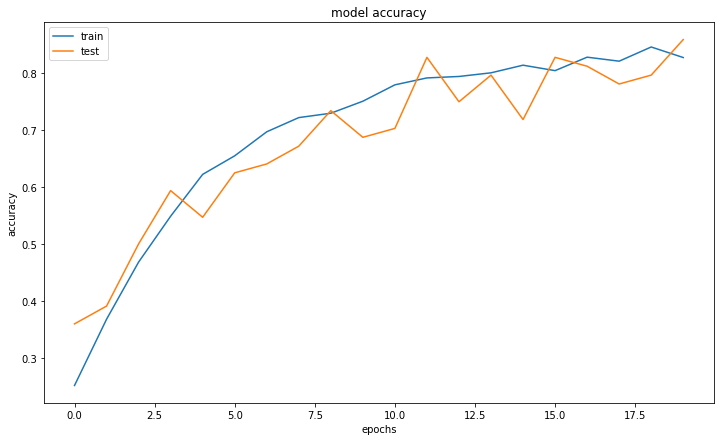

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

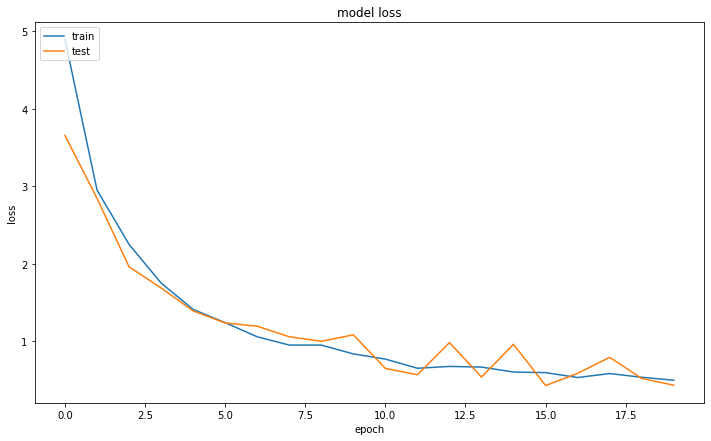

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()